# Tanmay Garg
## CS20BTECH11063
### Data Science Analysis Programming Exam

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize
import astroML
from astroML.stats import sigmaG
import pandas as pd
import seaborn as sns
np.random.seed(0)
import emcee
import corner
from sklearn.neighbors import KernelDensity
from IPython.display import display, Math
import dynesty
# import nestle
from astroML.correlation import bootstrap_two_point_angular

# Q1

In [31]:
hubble_cons1 = 67
hubble_cons_error1 = 2.3

hubble_cons2 = 71
hubble_cons_error2 = 1.3

def z_score(hubble_cons1, hubble_cons_error1, hubble_cons2, hubble_cons_error2):
    return abs((hubble_cons1 - hubble_cons2)/np.sqrt(hubble_cons_error1**2 + hubble_cons_error2**2))

print("Z Score of hubble constant: ", z_score(hubble_cons1, hubble_cons_error1, hubble_cons2, hubble_cons_error2))

# # calculate the Z Score of the two hubble constants in terms of sigma
# z_score1 = (hubble_cons1 - hubble_cons2)/np.sqrt(hubble_cons_error1**2 + hubble_cons_error2**2)
# z_score2 = (hubble_cons2 - hubble_cons1)/np.sqrt(hubble_cons_error1**2 + hubble_cons_error2**2)
# print("Z Score of hubble constant 1: ", z_score1)
# print("Z Score of hubble constant 2: ", z_score2)

# # calculate the p value of the two hubble constants
# p_value1 = stats.norm.sf(abs(z_score1))
# p_value2 = stats.norm.sf(abs(z_score2))
# print("P value of hubble constant 1: ", p_value1)
# print("P value of hubble constant 2: ", p_value2)

# print(stats.norm.isf(p_value1))
# print(stats.norm.isf(p_value2))

Z Score of hubble constant:  1.5140223282089291


# Q2

What values of constant delta chi square contours should be used for a model with 2 free parameters, 10 data points if we want 85% confidence?



In [37]:
stats.chi2(2).ppf(0.85)
print("The constant delta chi squared value is: ", stats.chi2(2).ppf(0.85))

The constant delta chi squared value is:  3.794239969771762


# Q3

In [22]:
reduced_chi2_A = 1.3
reduced_chi2_B = 0.7

num_free_param_A = 6
num_free_param_B = 8

num_data_point_fit = 10

# Calculate BIC between the two models

def BIC_func1(num_free_param, num_data_point_fit, reduced_chi2):
    return num_free_param*np.log(num_data_point_fit) + reduced_chi2

def BIC_func2(num_free_param, num_data_point_fit, reduced_chi2):
    return num_free_param*np.log(num_data_point_fit) - 2 * np.log(reduced_chi2 * num_free_param)

# BIC_A = BIC_func1(num_free_param_A, num_data_point_fit, reduced_chi2_A)
# BIC_B = BIC_func1(num_free_param_B, num_data_point_fit, reduced_chi2_B)
# print("BIC of model A: ", BIC_A)
# print("BIC of model B: ", BIC_B)
# print("BIC of model A - B: ", BIC_A - BIC_B)


BIC_A = BIC_func2(num_free_param_A, num_data_point_fit, reduced_chi2_A)
BIC_B = BIC_func2(num_free_param_B, num_data_point_fit, reduced_chi2_B)
print("BIC of model A: ", BIC_A)
print("BIC of model B: ", BIC_B)
print("BIC of model A - B: ", BIC_A - BIC_B)


BIC of model A:  9.707263090573182
BIC of model B:  14.97514754847016
BIC of model A - B:  -5.267884457896978


# Q4

Poisson samples:  [ 6  9 10  8  9 13 12  9  7 11  8  9  9 15 13 11 13 10  7 12 12  9 14 12
 10 13 12  9 10 11 10 11 10  8  4 15 11  9 11 12  7  7 18 14  7 10  6  8
  7  7  9  8 11  6 13 11 13 12 12 13 11  4 10  9  4  9  8 14  8  7  9  9
 12 12  7  9  3 15 11 10 13  8  6 14 12  7 13 12  6 10 11  7  2 17  8 11
 12 10  8  7 10 15  7 16  8 10 11 12 18 10  7  5 11 10  9  5  9 12 12  6
 12 11  3  8  6  8 17  9  5  8 14  6 11  4  7  8 14 15 10 13 15  8 15 13
 10 15  7 12  9 13 12 10 10 12  8 20  8 12  8 10 12  9  8  9 12  5 10 20
 11 18  8  9 12  7 12 11 10 16 11 11  6  8 10 14 12 14 13  8  4  8  8 15
 11 10  9  9 15  9 13 10 11  9 10  9  7  9 12 14 13  9  7  6  6 16 14  7
 12  9 14 12 10  6 10 13 13  9 12 10 17 11 14 10 11  8 13 13 13  7  9 11
  7  4  6 15 11  6 11  9 14 10 12  8  7 10  9 11 13  5 10  7 11 10  6  8
 14 13 16 12 11  8 12 14 12  9  5 10 11  9  8  8  9 12 10  7  8 12 14 18
  7 10  5  6  9  8  8 10 13  8 11 10 11  6  9 10  9 10  9  7  8 13  9 12
  9  8  5 14  7  8  8 12 12 10  8

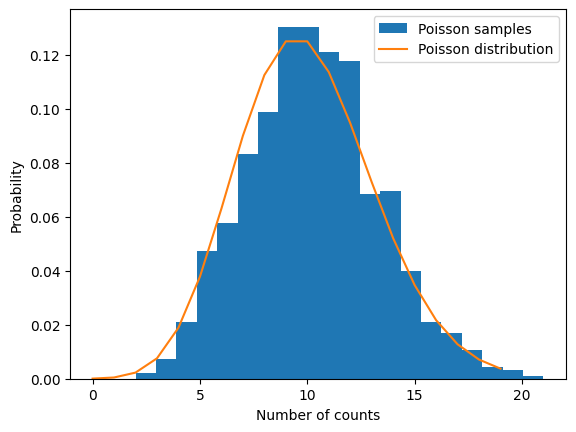

In [30]:
# Show the code for generating 1000 Poisson distributed random numbers with mean 10

mean = 10
num_samples = 1000
poisson_samples = np.random.poisson(mean, num_samples)
print("Poisson samples: ", poisson_samples)
print("Mean of poisson samples: ", np.mean(poisson_samples))

# plot the histogram of the poisson samples and compare it to the poisson distribution
plt.figure()
plt.hist(poisson_samples, bins=20, density=True, label="Poisson samples")
plt.plot(np.arange(0, 20), stats.poisson.pmf(np.arange(0, 20), mean), label="Poisson distribution")
plt.xlabel("Number of counts")
plt.ylabel("Probability")
plt.legend()
plt.show()